In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from hand_tracker import HandTracker

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
palm_model_path = #path to palm_detection.tflite
landmark_model_path = #path to hand_landmark.tflite
anchors_path = "./anchors.csv" 

In [4]:
cam = cv2.VideoCapture(0)
img = cam.read()[1][:,:,::-1]
cam.release()

In [5]:
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path)

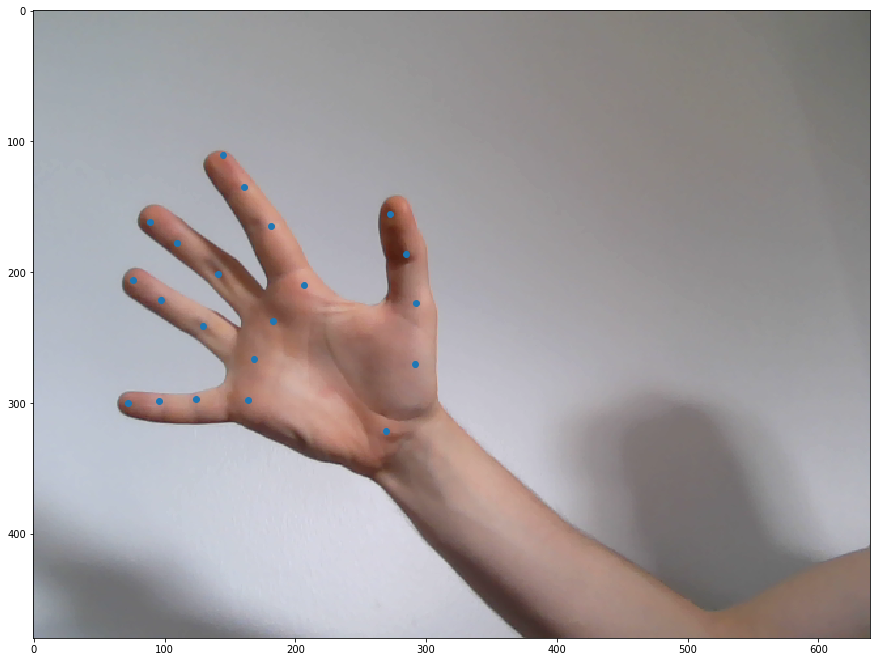

In [6]:
kp = detector(img)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.scatter(kp[:,0], kp[:,1])